<a href="https://colab.research.google.com/github/fade-01/GSG-CarPrice-Prediction/blob/main/GSG_CarPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("halow world")

halow world


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [5]:
path = '/content/'
file = path + 'CarPrice_Assignment.csv'
file1 = path+ 'Data Dictionary - carprices.xlsx'


In [6]:
# Reading the automobile consulting company file on which analysis needs to be done

df_auto = pd.read_csv(file)

df_auto.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [7]:
# Reading the data dictionary file

df_stru = pd.read_excel(file1)
df_stru.head(2)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# shape of the data
df_auto.shape


(205, 26)

In [9]:
# information of the data
df_auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
# description of the data
df_auto.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [11]:
# dropping car_ID based on business knowledge

df_auto = df_auto.drop('car_ID',axis=1)


In [12]:
# Calculating the Missing Values % contribution in DF

df_null = df_auto.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()


,0
symboling,0.0000
enginetype,0.0000
highwaympg,0.0000
citympg,0.0000
peakrpm,0.0000


In [13]:
# Datatypes
df_auto.dtypes


,0
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64
carlength,float64


(205, 25)

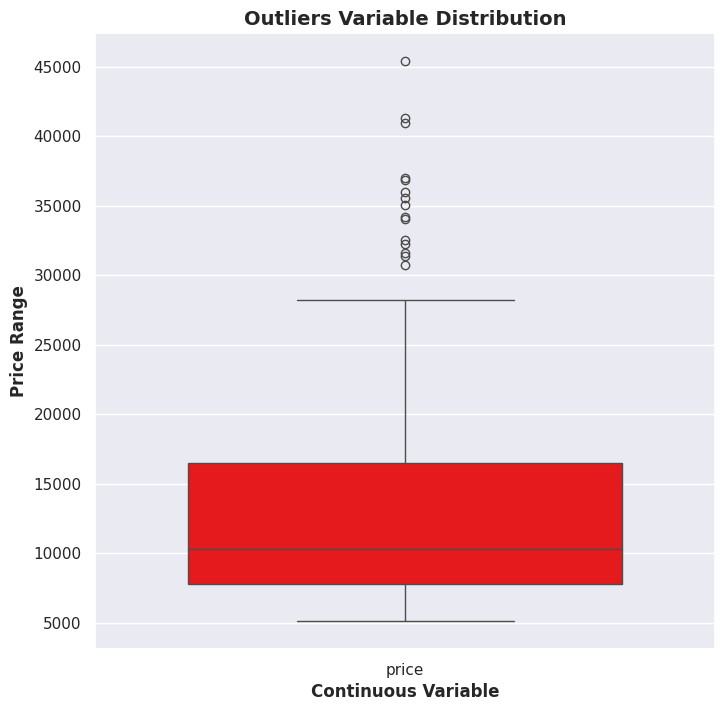

In [14]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_auto[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df_auto.shape


In [16]:
# Extracting Car Company from the CarName as per direction in Problem

df_auto['CarName'] = df_auto['CarName'].str.split(' ',expand=True)[0]


In [17]:
# Unique Car company

df_auto['CarName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [18]:
# Renaming the typo errors in Car Company names

df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})


In [19]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df_auto['symboling'] = df_auto['symboling'].astype(str)


In [20]:
# checking for duplicates

df_auto.loc[df_auto.duplicated()]


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [21]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]


Text(0, 0.5, 'Count of Cars')

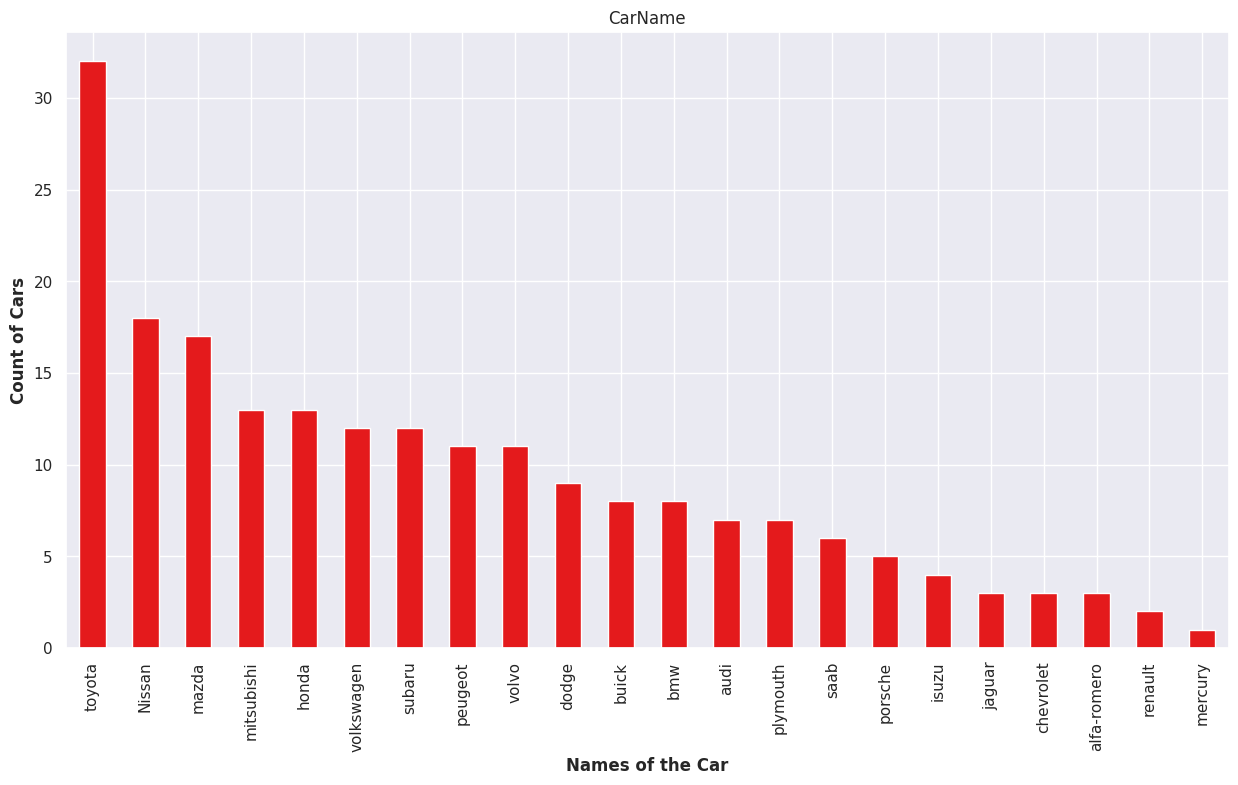

In [22]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=df_auto['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')


<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

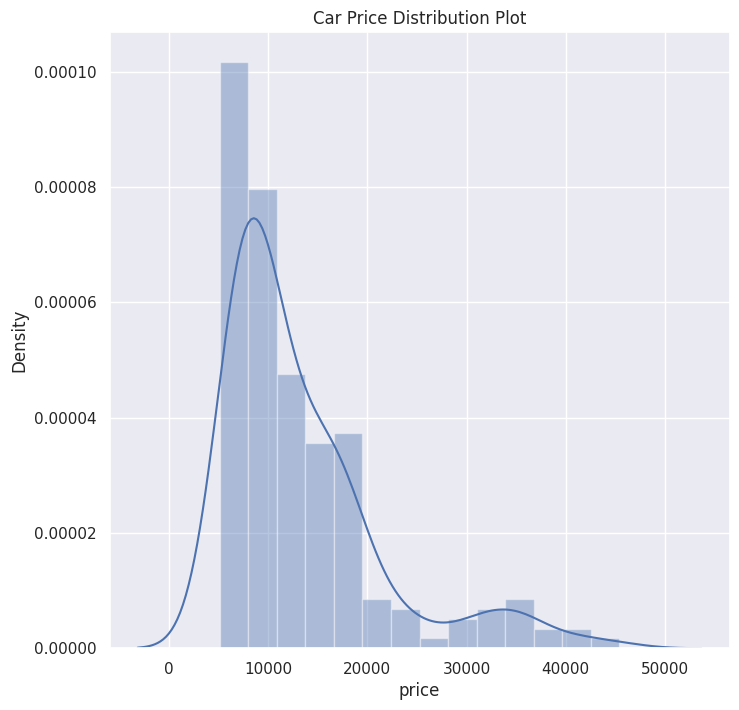

In [23]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df_auto['price'])


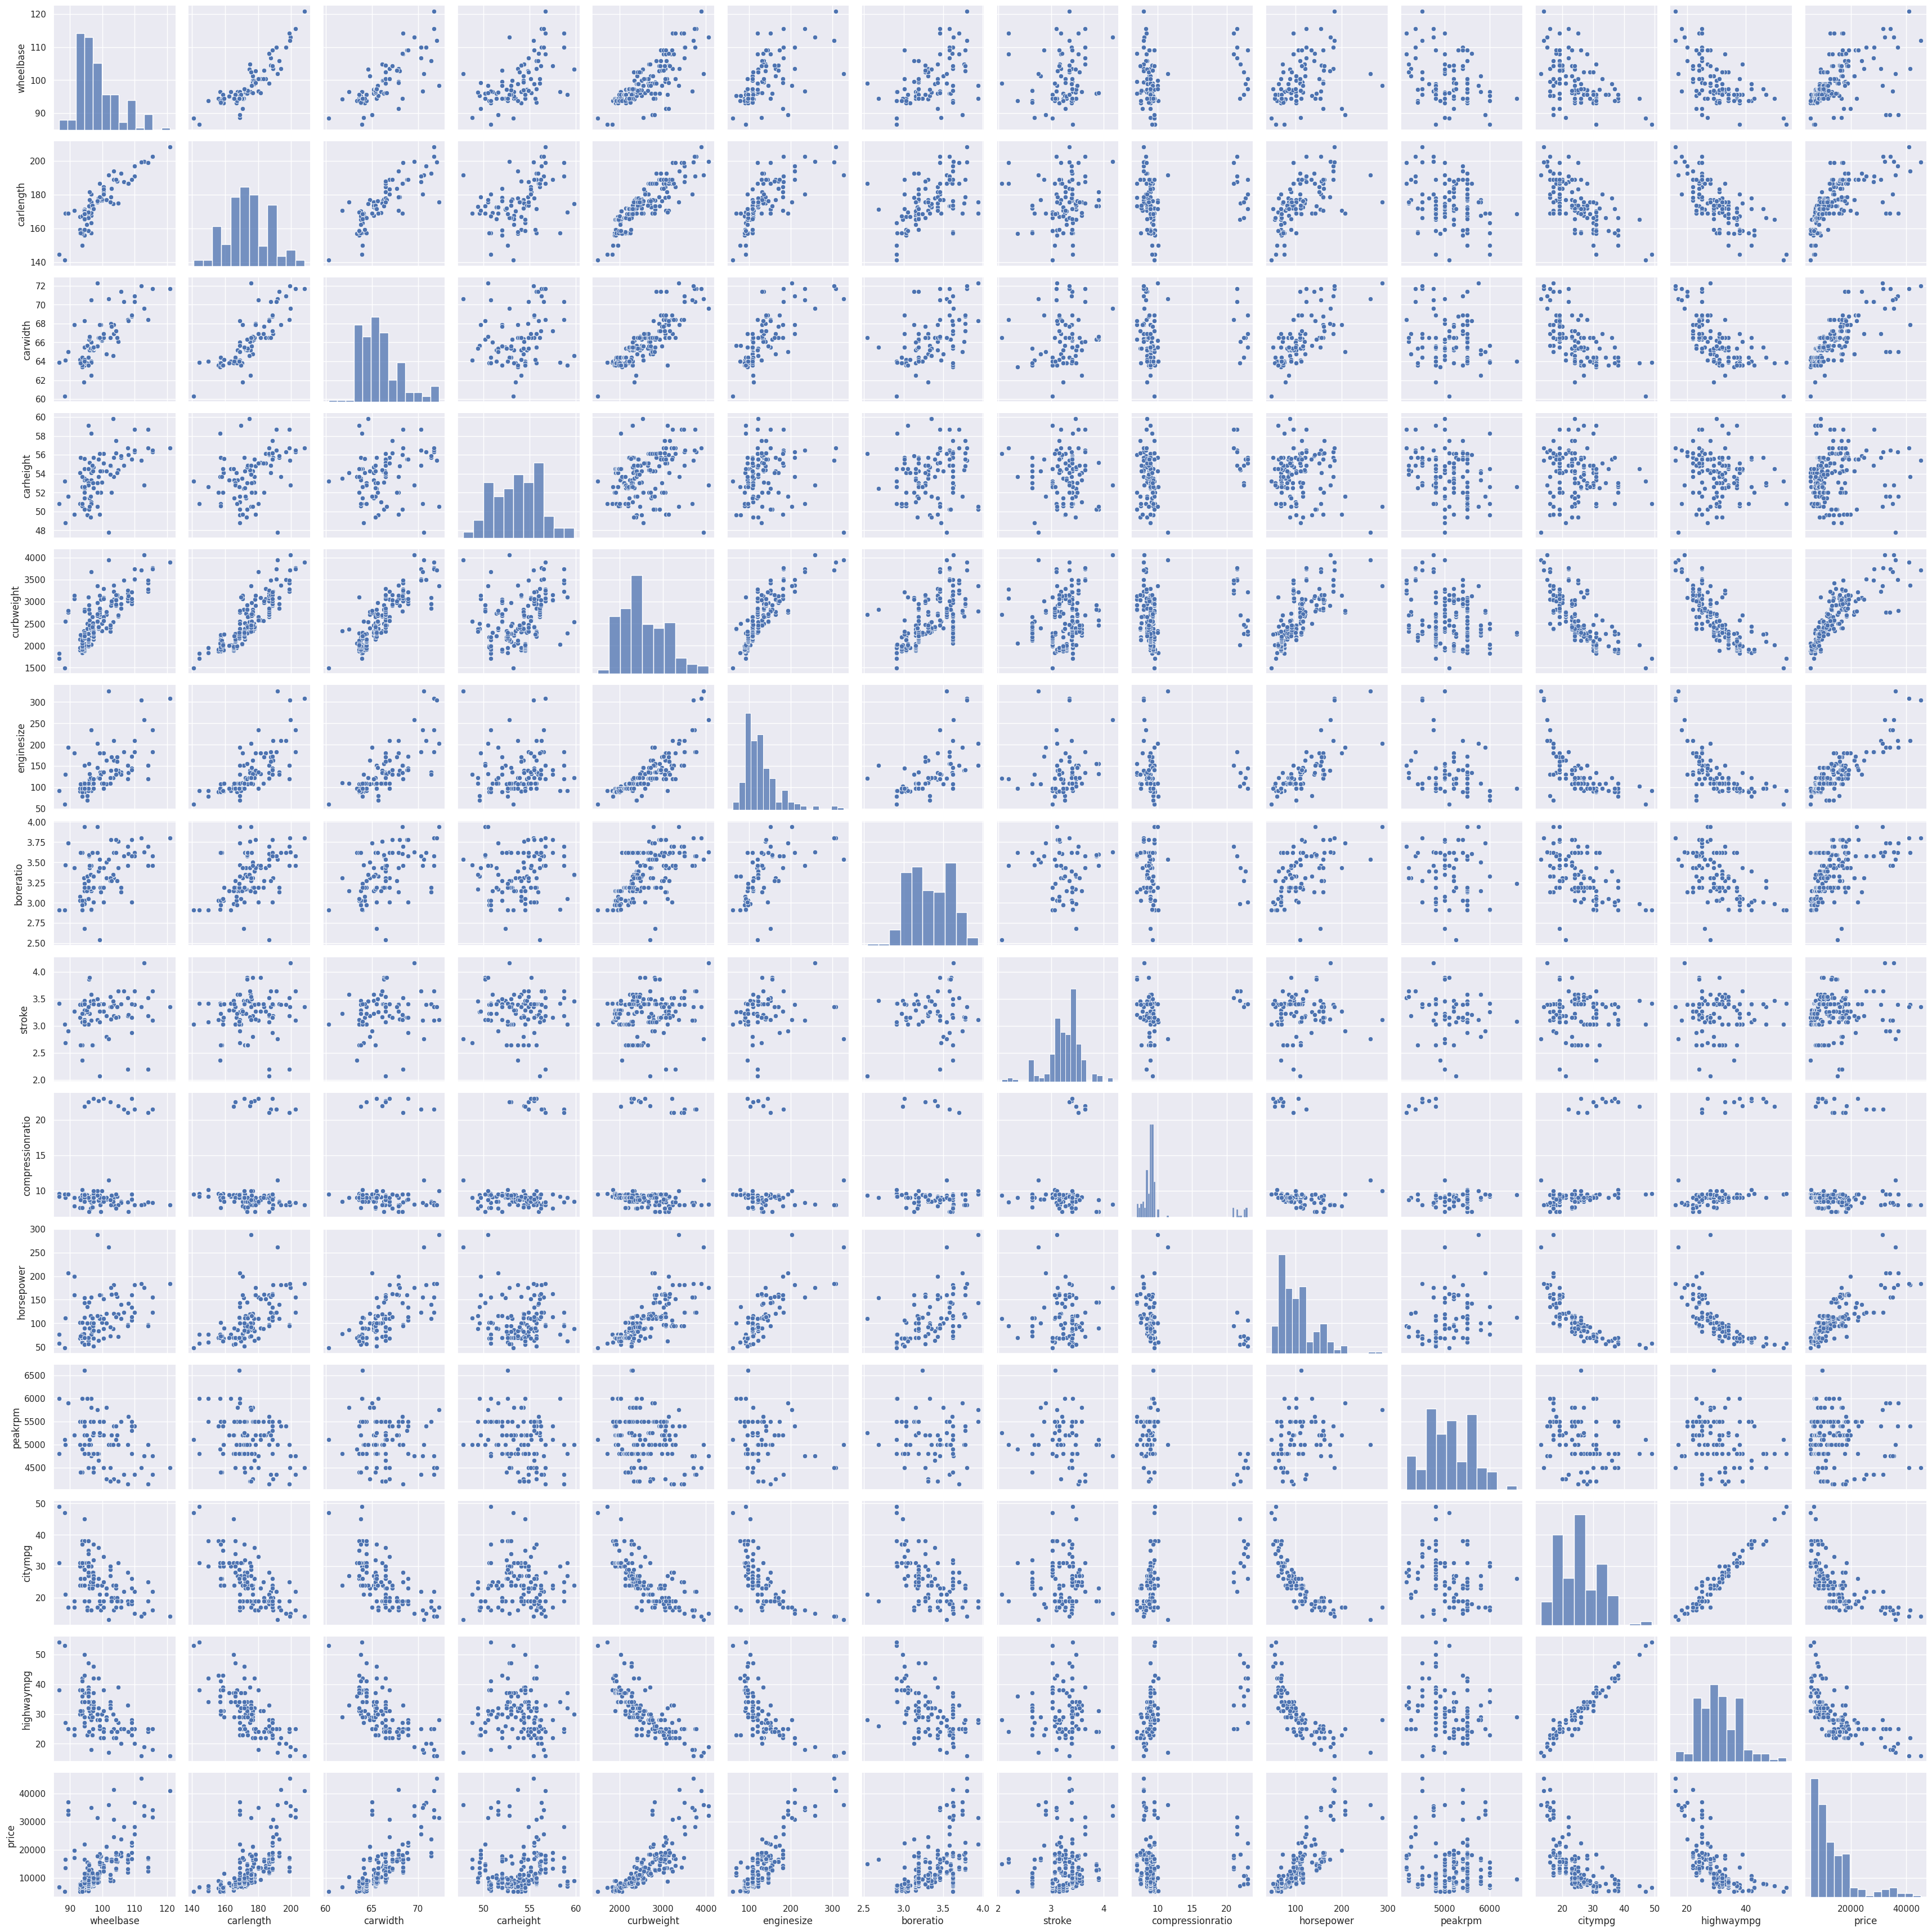

In [24]:
ax = sns.pairplot(df_auto[num_col])


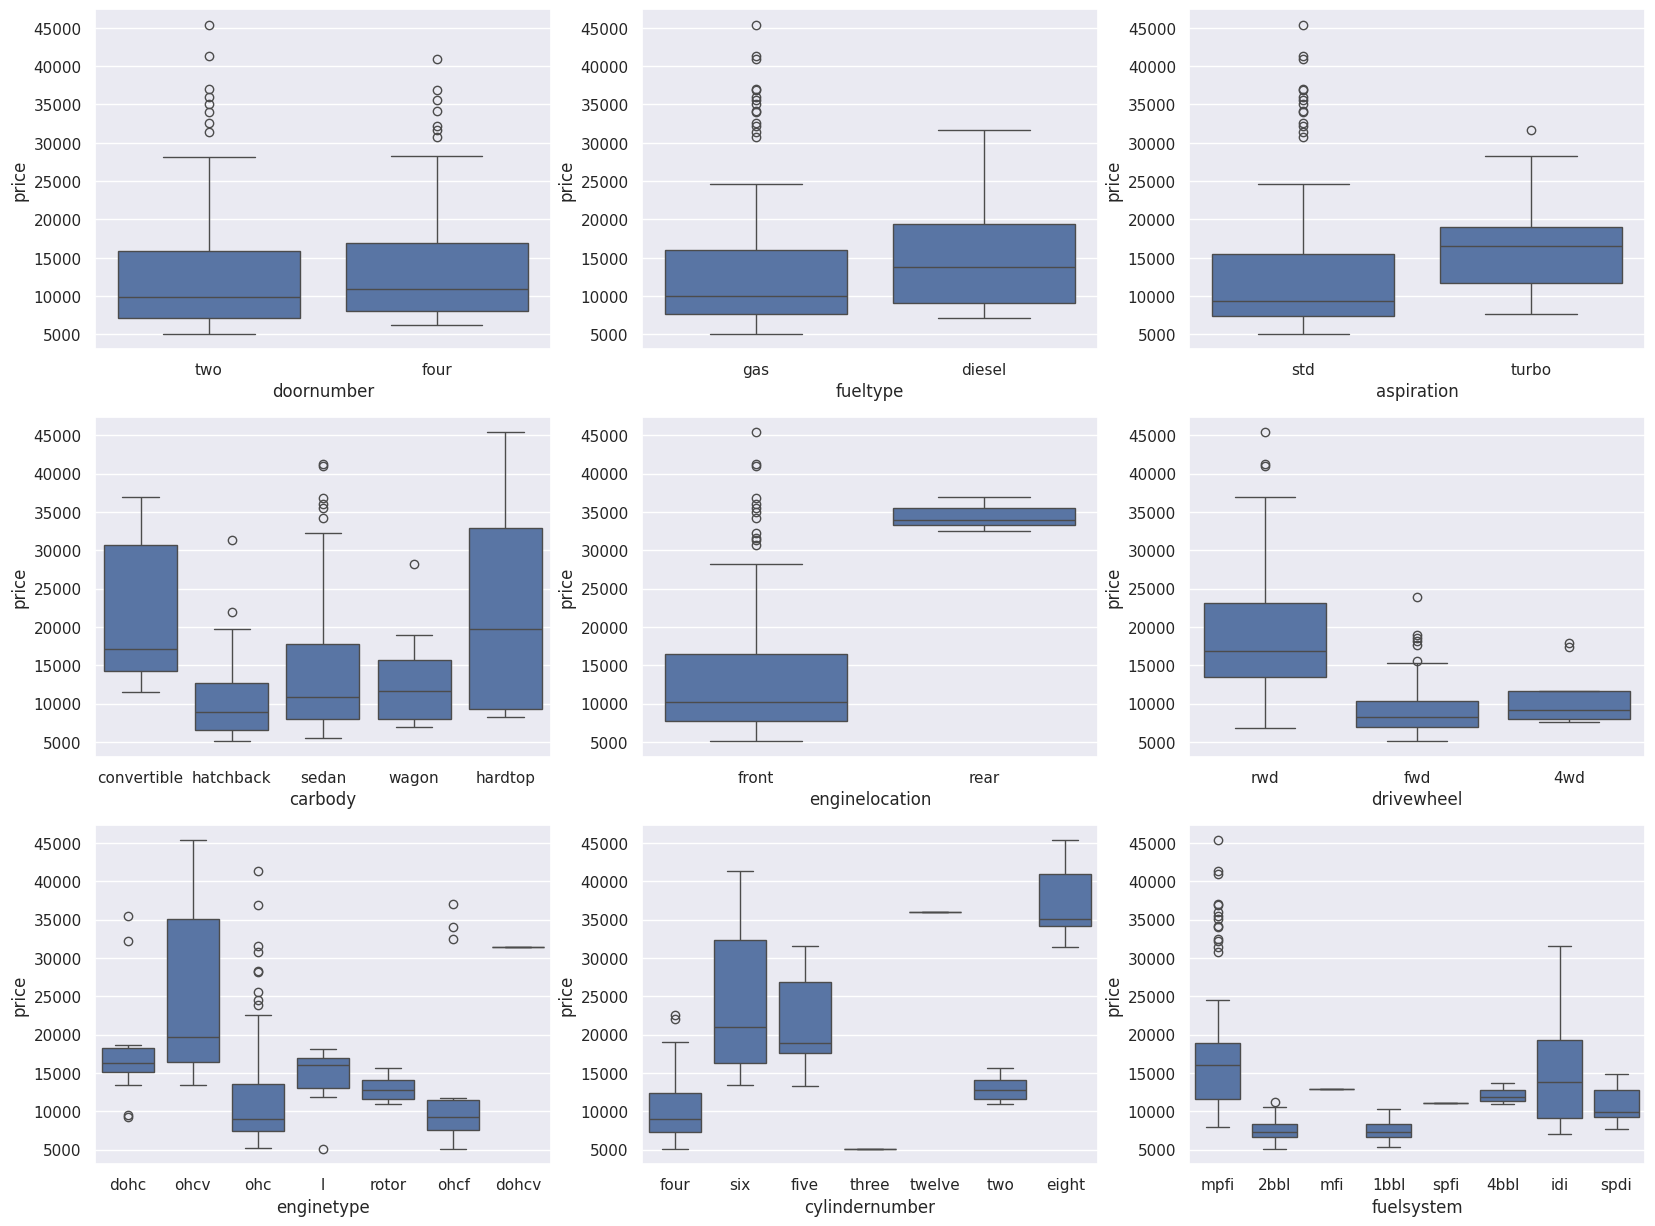

In [25]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_auto)
plt.show()

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

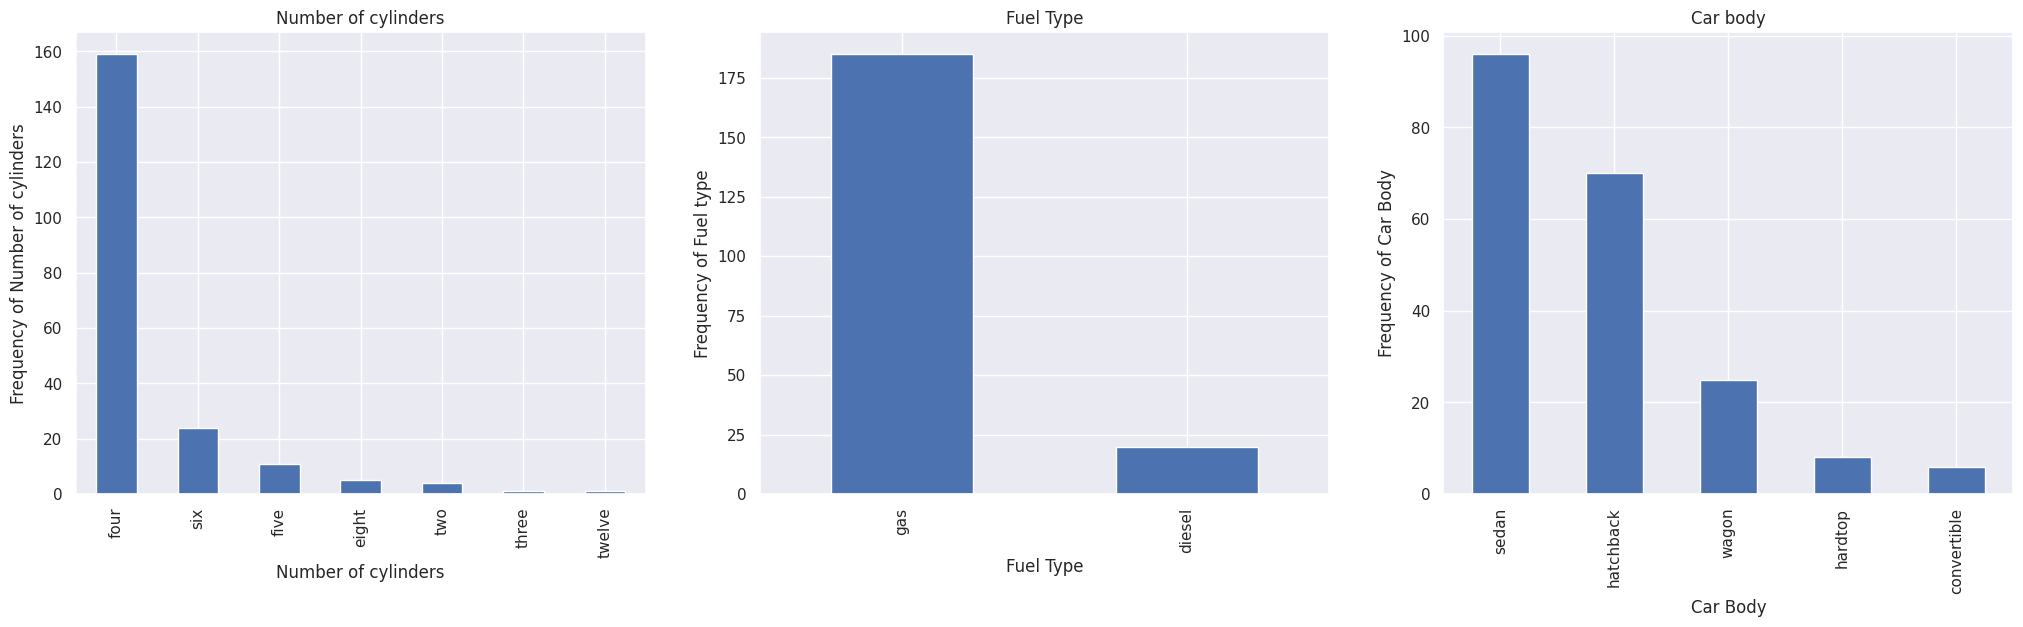

In [29]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_auto['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df_auto['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df_auto['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')


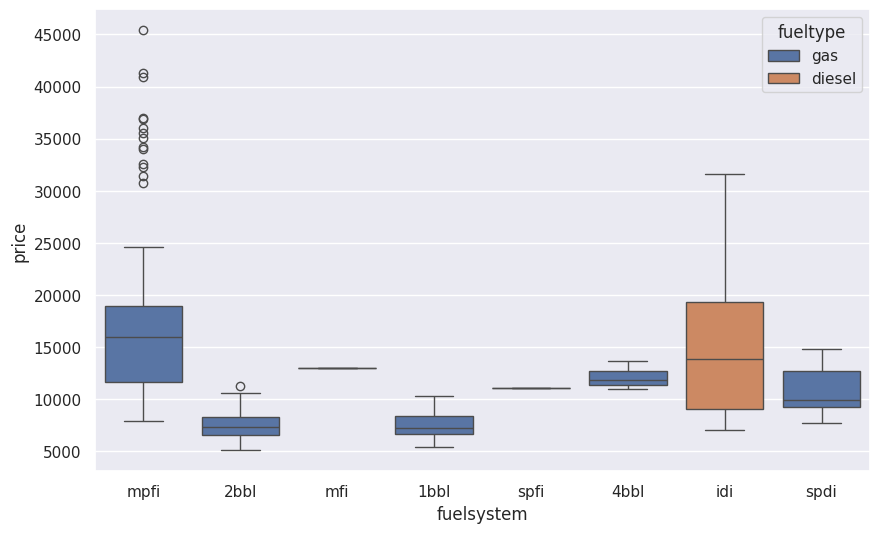

In [30]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df_auto)
plt.show()


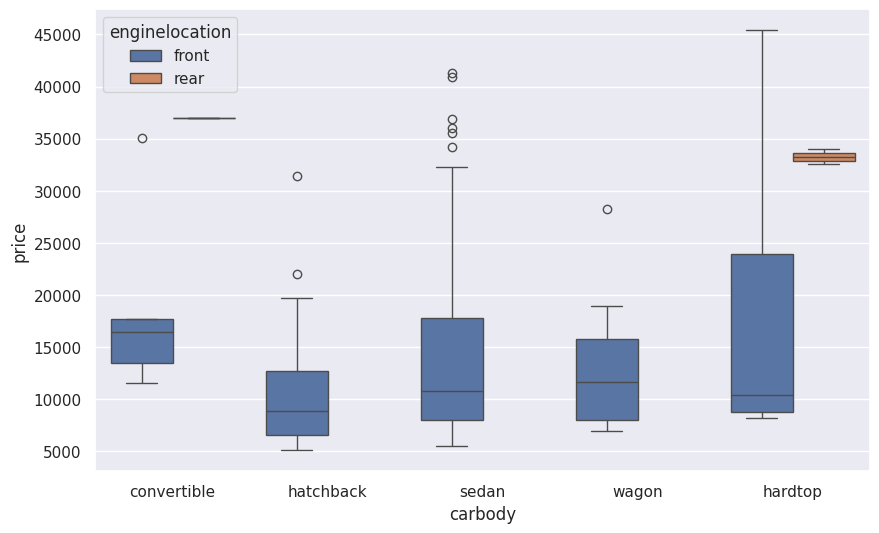

In [31]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df_auto)
plt.show()

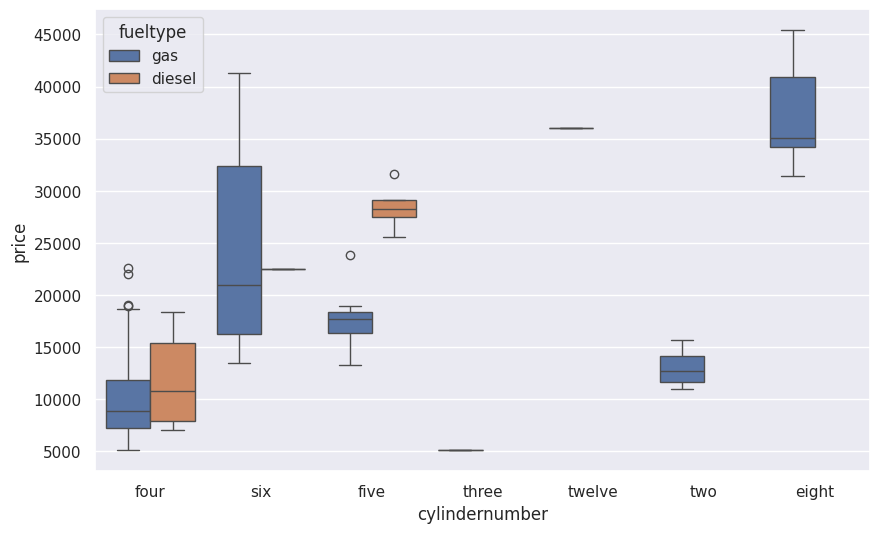

In [32]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df_auto)
plt.show()


<Figure size 2000x600 with 0 Axes>

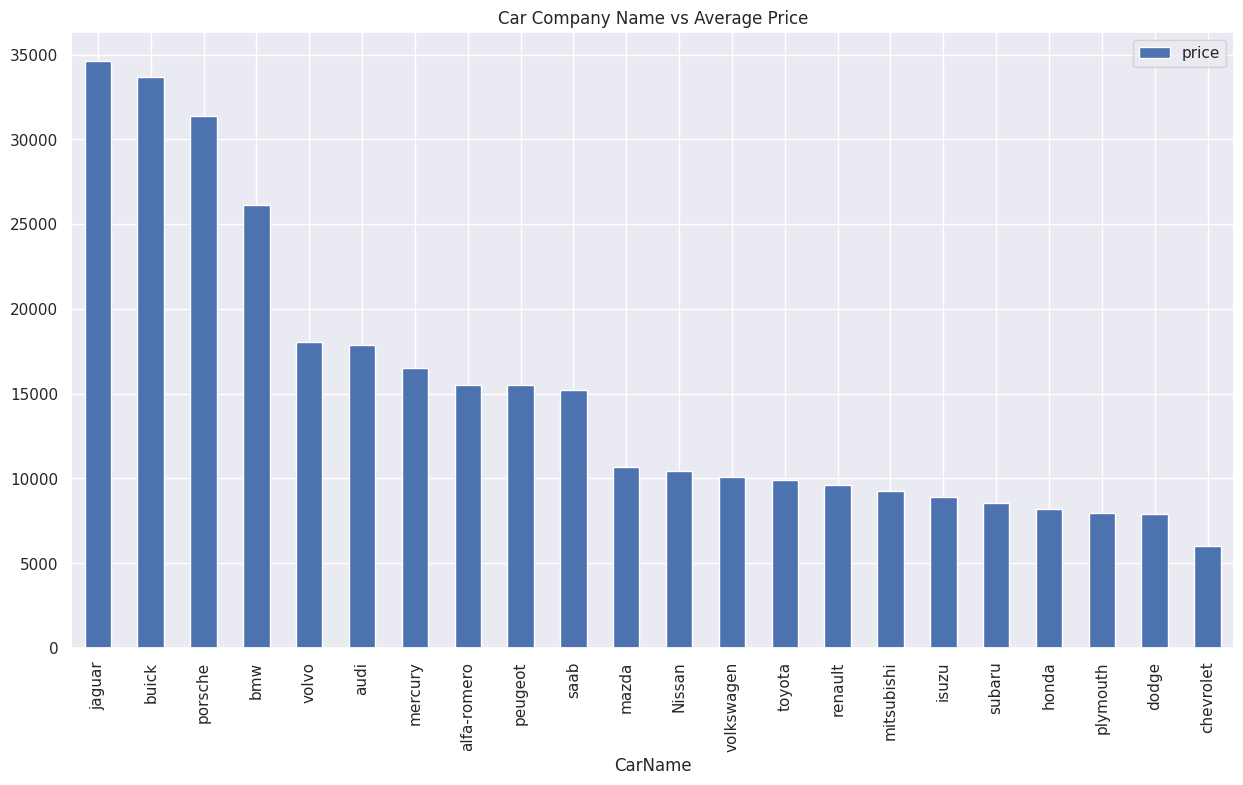

In [33]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df_auto.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()


<Figure size 2000x600 with 0 Axes>

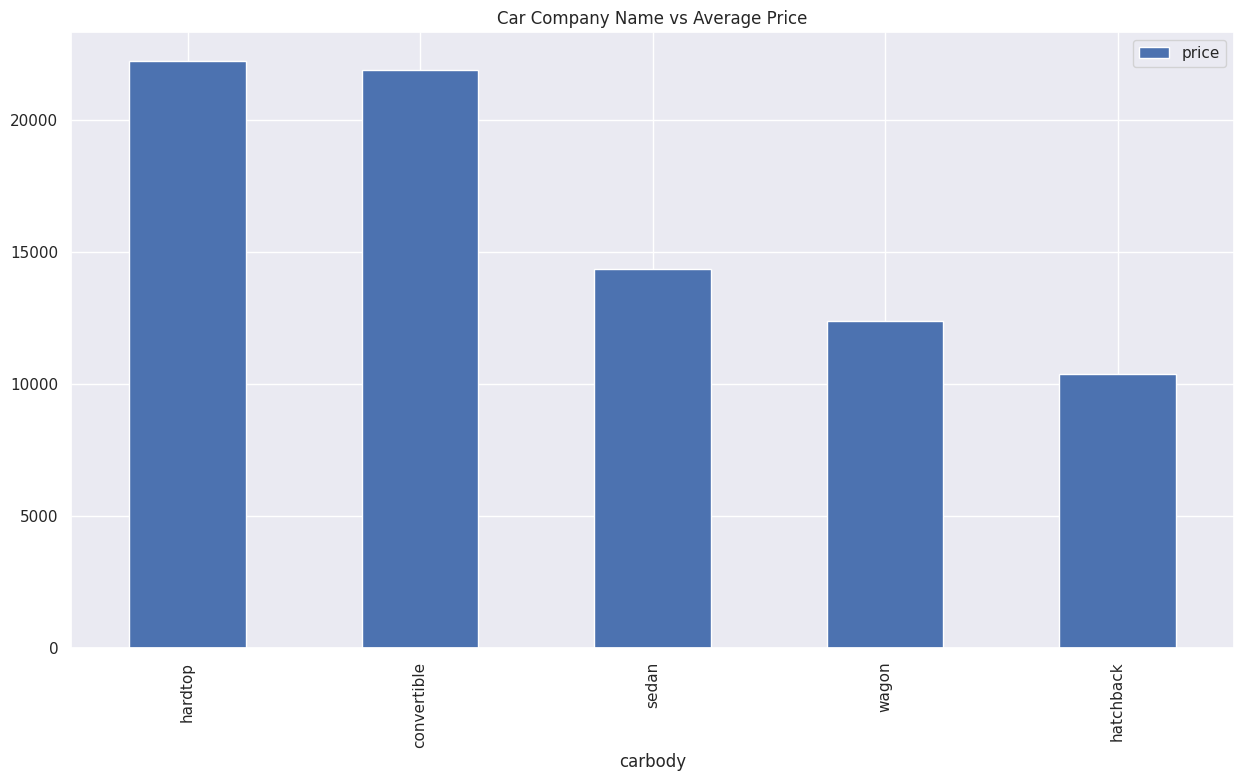

In [34]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(df_auto.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()


In [35]:
#Binning the Car Companies based on avg prices of each car Company.

df_auto['price'] = df_auto['price'].astype('int')
df_auto_temp = df_auto.copy()
t = df_auto_temp.groupby(['CarName'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df_auto['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df_auto.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


In [36]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower',
                    'citympg','highwaympg', 'carlength','carwidth']


In [37]:
df_auto = df_auto[sig_col]


Step 4: Data Preparation

In [38]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']


In [39]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df_auto[sig_cat_col])
dummies.shape


(205, 29)

In [40]:
dummies = pd.get_dummies(df_auto[sig_cat_col], drop_first = True)
dummies.shape


(205, 22)

In [41]:
# Add the results to the original dataframe

df_auto = pd.concat([df_auto, dummies], axis = 1)


In [42]:
# Drop the original cat variables as dummies are already created

df_auto.drop( sig_cat_col, axis = 1, inplace = True)
df_auto.shape


(205, 32)

Step 5: Splitting the Data into Training and Testing Sets


In [43]:
df_auto

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,16500,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,True,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
3,13950,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,True,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
4,17450,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1000,2952,141,3.7800,114,23,28,188.8000,68.9000,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
201,19045,109.1000,3049,141,3.7800,160,19,25,188.8000,68.8000,True,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
202,21485,109.1000,3012,173,3.5800,134,18,23,188.8000,68.9000,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
203,22470,109.1000,3217,145,3.0100,106,26,27,188.8000,68.9000,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False


In [44]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_auto, train_size = 0.7, test_size = 0.3, random_state = 100)


In [45]:
df_train.head()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93.7000,2191,98,2.9700,68,31,38,167.3000,63.8000,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
125,22018,94.5000,2778,151,3.9400,143,19,27,168.9000,68.3000,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
166,9538,94.5000,2300,98,3.2400,112,26,29,168.7000,64.0000,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
199,18950,104.3000,3157,130,3.6200,162,17,22,188.8000,67.2000,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False


In [46]:
scaler = preprocessing.StandardScaler()


In [47]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']


In [48]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])


In [49]:
df_train.head()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.7002,-0.8118,-0.6421,-0.6602,-1.2973,-0.8729,0.8398,1.0254,-0.4872,-0.9245,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
125,1.1519,-0.6772,0.4394,0.6378,2.4323,1.0218,-0.9570,-0.5575,-0.3598,1.1150,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
166,-0.4522,-0.6772,-0.4413,-0.6602,-0.2592,0.2387,0.0911,-0.2697,-0.3757,-0.8339,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,0.4426,-1.6703,0.0156,0.1235,0.6251,0.2134,-0.6576,-0.5575,-0.3678,-0.7885,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
199,0.7576,0.9724,1.1377,0.1235,1.2019,1.5018,-1.2565,-1.2770,1.2254,0.6164,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False


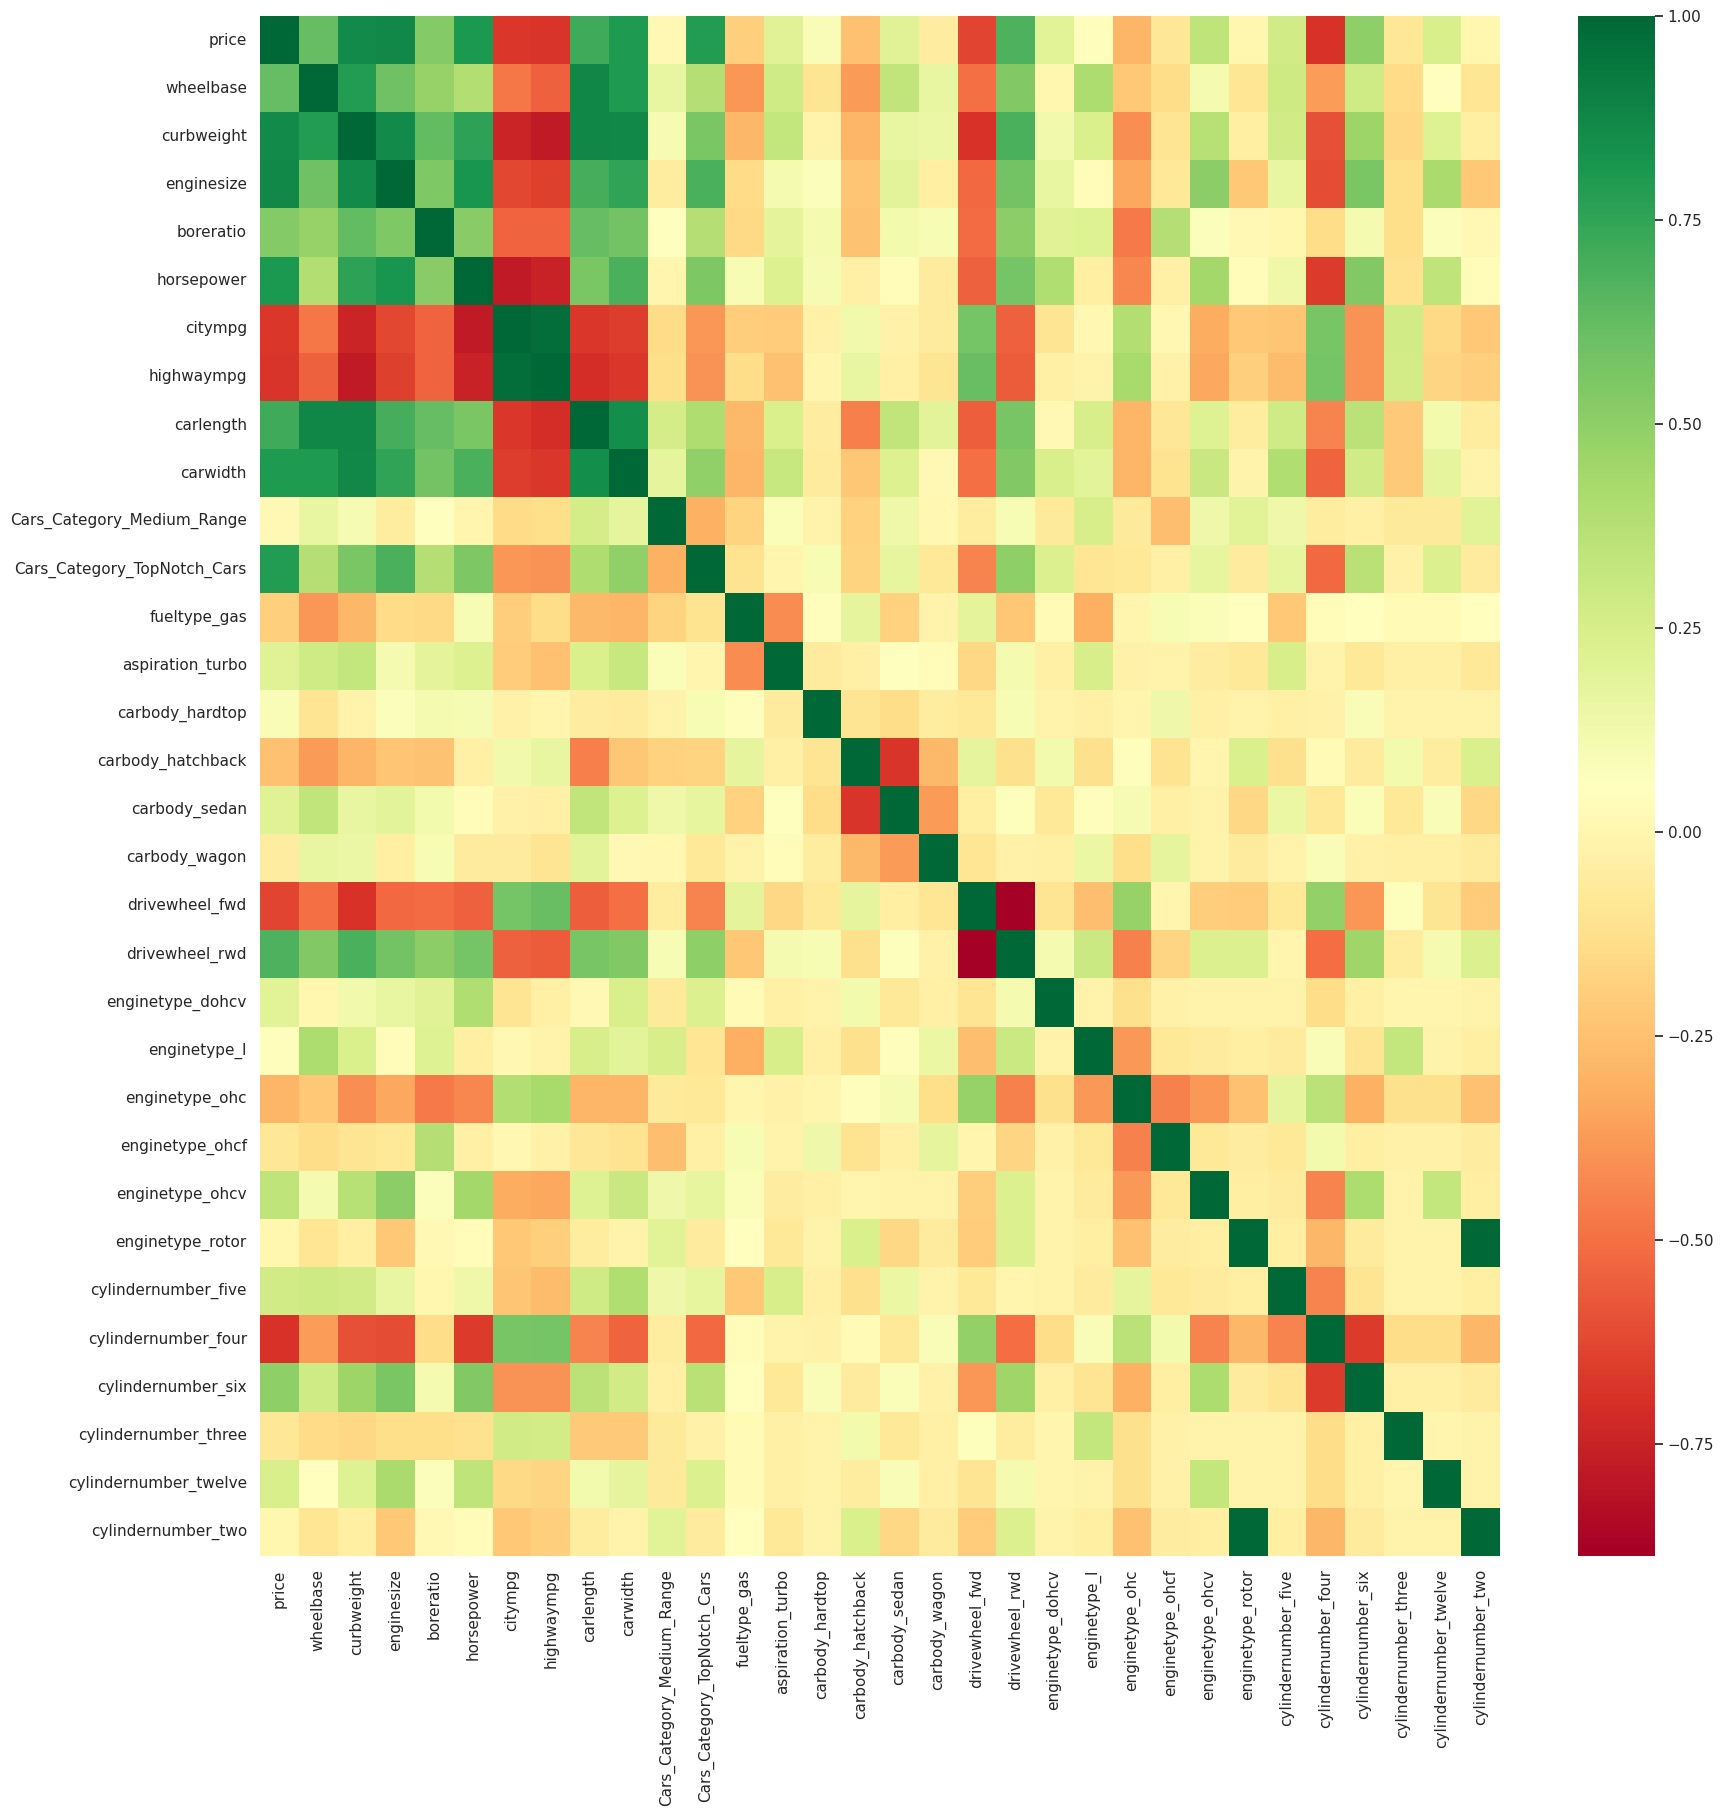

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()


In [51]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']


ValueError: Could not interpret value `c` for `x`. An entry with this name does not appear in `data`.

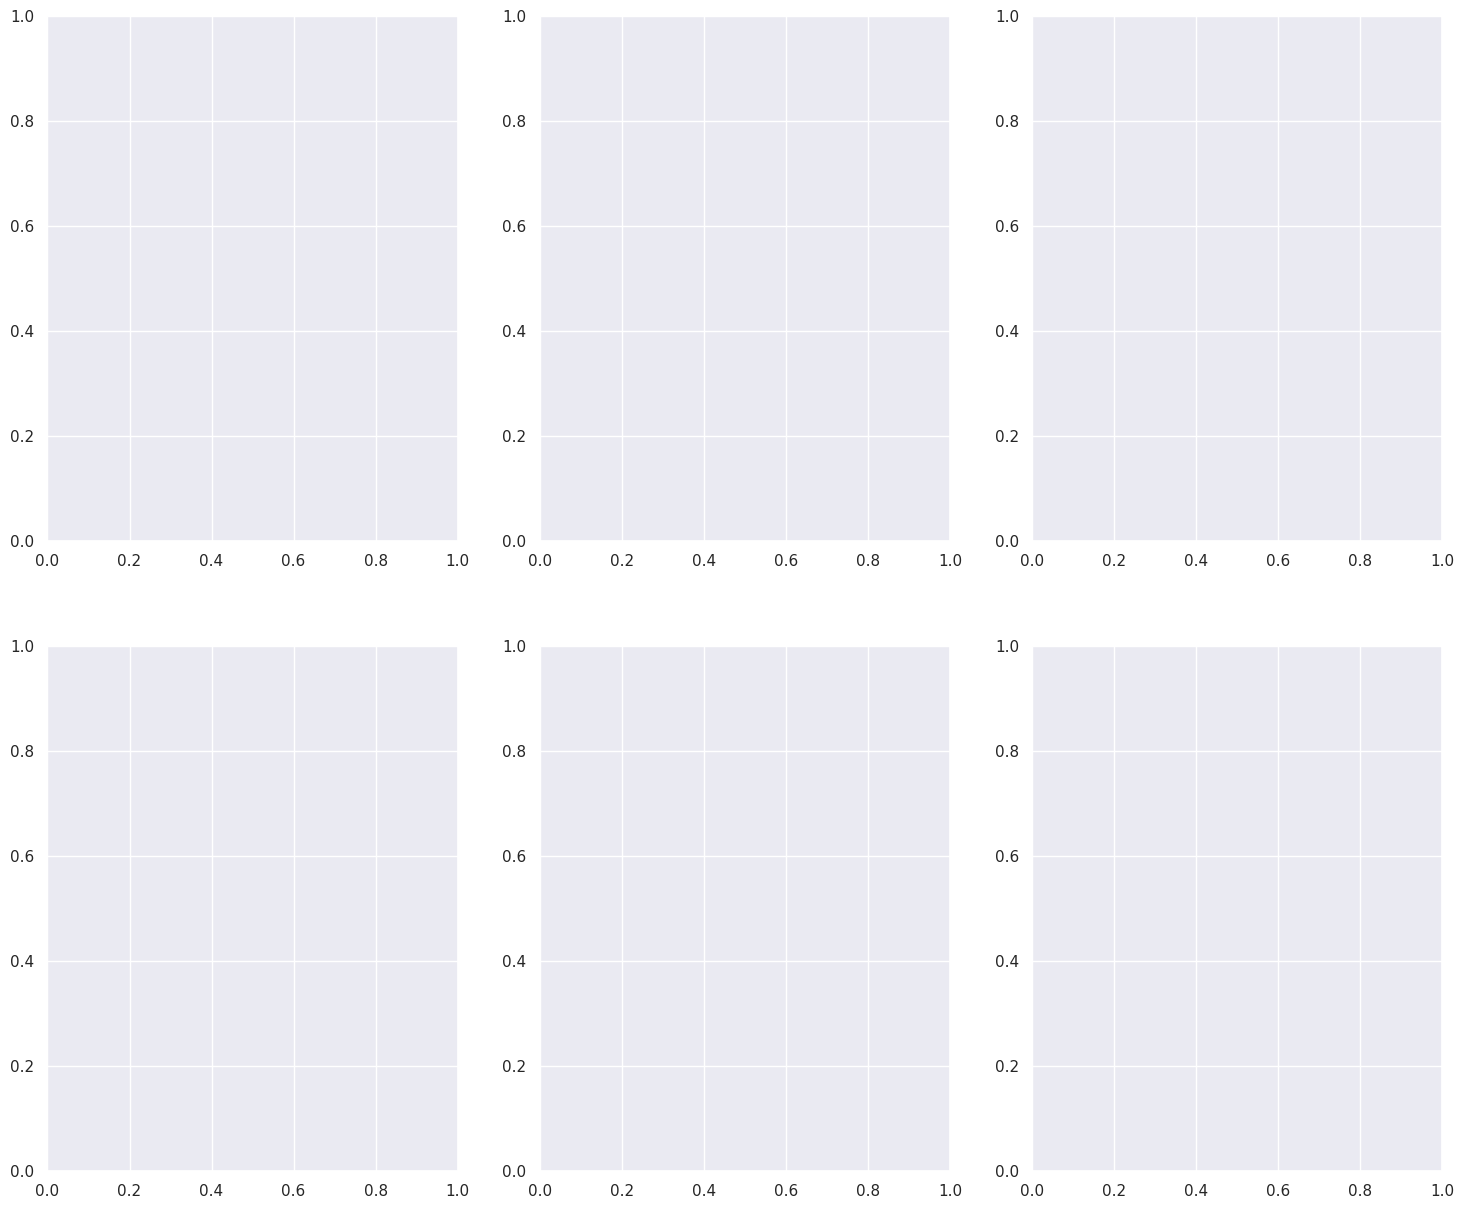

In [109]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df_auto, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.5)


In [53]:
y_train = df_train.pop('price')
X_train = df_train


In [100]:
print(y_train)


122   -0.7002
125    1.1519
166   -0.4522
1      0.4426
199    0.7576
        ...  
87    -0.4855
103    0.0569
67     1.6062
24    -0.8776
8      1.3906
Name: price, Length: 143, dtype: float64


Step 6: Building a Linear Model

In [54]:
X_train_1 = X_train['horsepower']


In [55]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()


In [56]:
# Check parameters created

lr_1.params


,0
const,0.0000
horsepower,0.8062


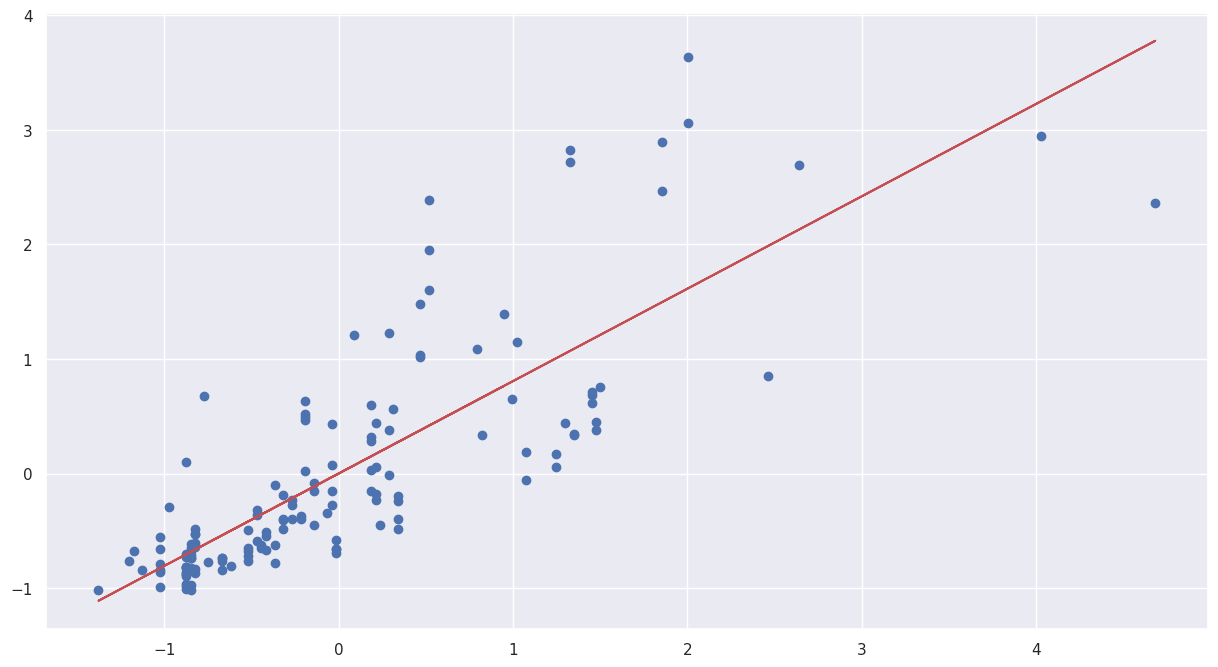

In [57]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()


In [111]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.05e-34
Time:                        10:08:06   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.050   1.43e-15      1.0

In [112]:
X_train_2 = X_train[['horsepower', 'curbweight']]


In [60]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()


In [61]:
lr_2.params


,0
const,0.0000
horsepower,0.3581
curbweight,0.5898


In [62]:
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.34e-49
Time:                        09:35:34   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.038   1.87e-15      1.0

In [63]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]


In [64]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()


In [65]:
lr_3.params


,0
const,0.0000
horsepower,0.2288
curbweight,0.3938
enginesize,0.3400


In [66]:
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.16e-51
Time:                        09:36:24   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.204e-17      0.036   1.44e-15      1.0

In [69]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [70]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 14)]

In [71]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup


Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [72]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]


In [86]:
print(X_train_rfe.dtypes)
print(y_train.dtypes)


curbweight                     float64
horsepower                     float64
carwidth                       float64
Cars_Category_TopNotch_Cars       bool
carbody_hardtop                   bool
carbody_hatchback                 bool
carbody_sedan                     bool
carbody_wagon                     bool
enginetype_dohcv                  bool
enginetype_ohc                    bool
enginetype_ohcv                   bool
cylindernumber_five               bool
cylindernumber_four               bool
cylindernumber_six                bool
cylindernumber_twelve             bool
dtype: object
float64


In [87]:
import pandas as pd

X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


In [88]:
print(X_train_rfe.isnull().sum())
print(y_train.isnull().sum())


curbweight                     0
horsepower                     0
carwidth                       0
Cars_Category_TopNotch_Cars    0
carbody_hardtop                0
carbody_hatchback              0
carbody_sedan                  0
carbody_wagon                  0
enginetype_dohcv               0
enginetype_ohc                 0
enginetype_ohcv                0
cylindernumber_five            0
cylindernumber_four            0
cylindernumber_six             0
cylindernumber_twelve          0
dtype: int64
0


In [89]:
X_train_rfe = X_train_rfe.dropna()
y_train = y_train.loc[X_train_rfe.index]  # التأكد من تطابق الفهارس


In [90]:
X_train_rfe = X_train_rfe.fillna(X_train_rfe.mean())
y_train = y_train.fillna(y_train.mean())


In [110]:
print(X_train_rfe.shape)
print(y_train.shape)


(143, 15)
(143,)


In [92]:
import statsmodels.api as sm
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

# عرض ملخص النموذج
print(lm_rfe.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''